In [22]:
def test_tflite_model(tflite_filename, test_data):
    # TFLite 인터프리터 생성
    results =[]
    interpreter = tf.lite.Interpreter(model_path=tflite_filename)
    interpreter.allocate_tensors()
    
    # 입력 및 출력 텐서 정보 가져오기
    input_details = interpreter.get_input_details()
    output_details = interpreter.get_output_details()
    
    # 테스트 데이터에 대한 예측
    X = test_data[0][0]
    y = test_data[0][1] 
    
    for i in range(len(X)):
        interpreter.set_tensor(input_details[0]['index'],np.expand_dims(X[i], axis=0))
        interpreter.invoke()
        output = interpreter.get_tensor(output_details[0]['index'])
        results.append(output[0])
    
    return np.array(results)

In [23]:
import tensorflow as tf
data = tf.keras.utils.image_dataset_from_directory('data', labels='inferred')
file_paths = data.file_paths # the sequence does not match the seq of pic

Found 12 files belonging to 2 classes.


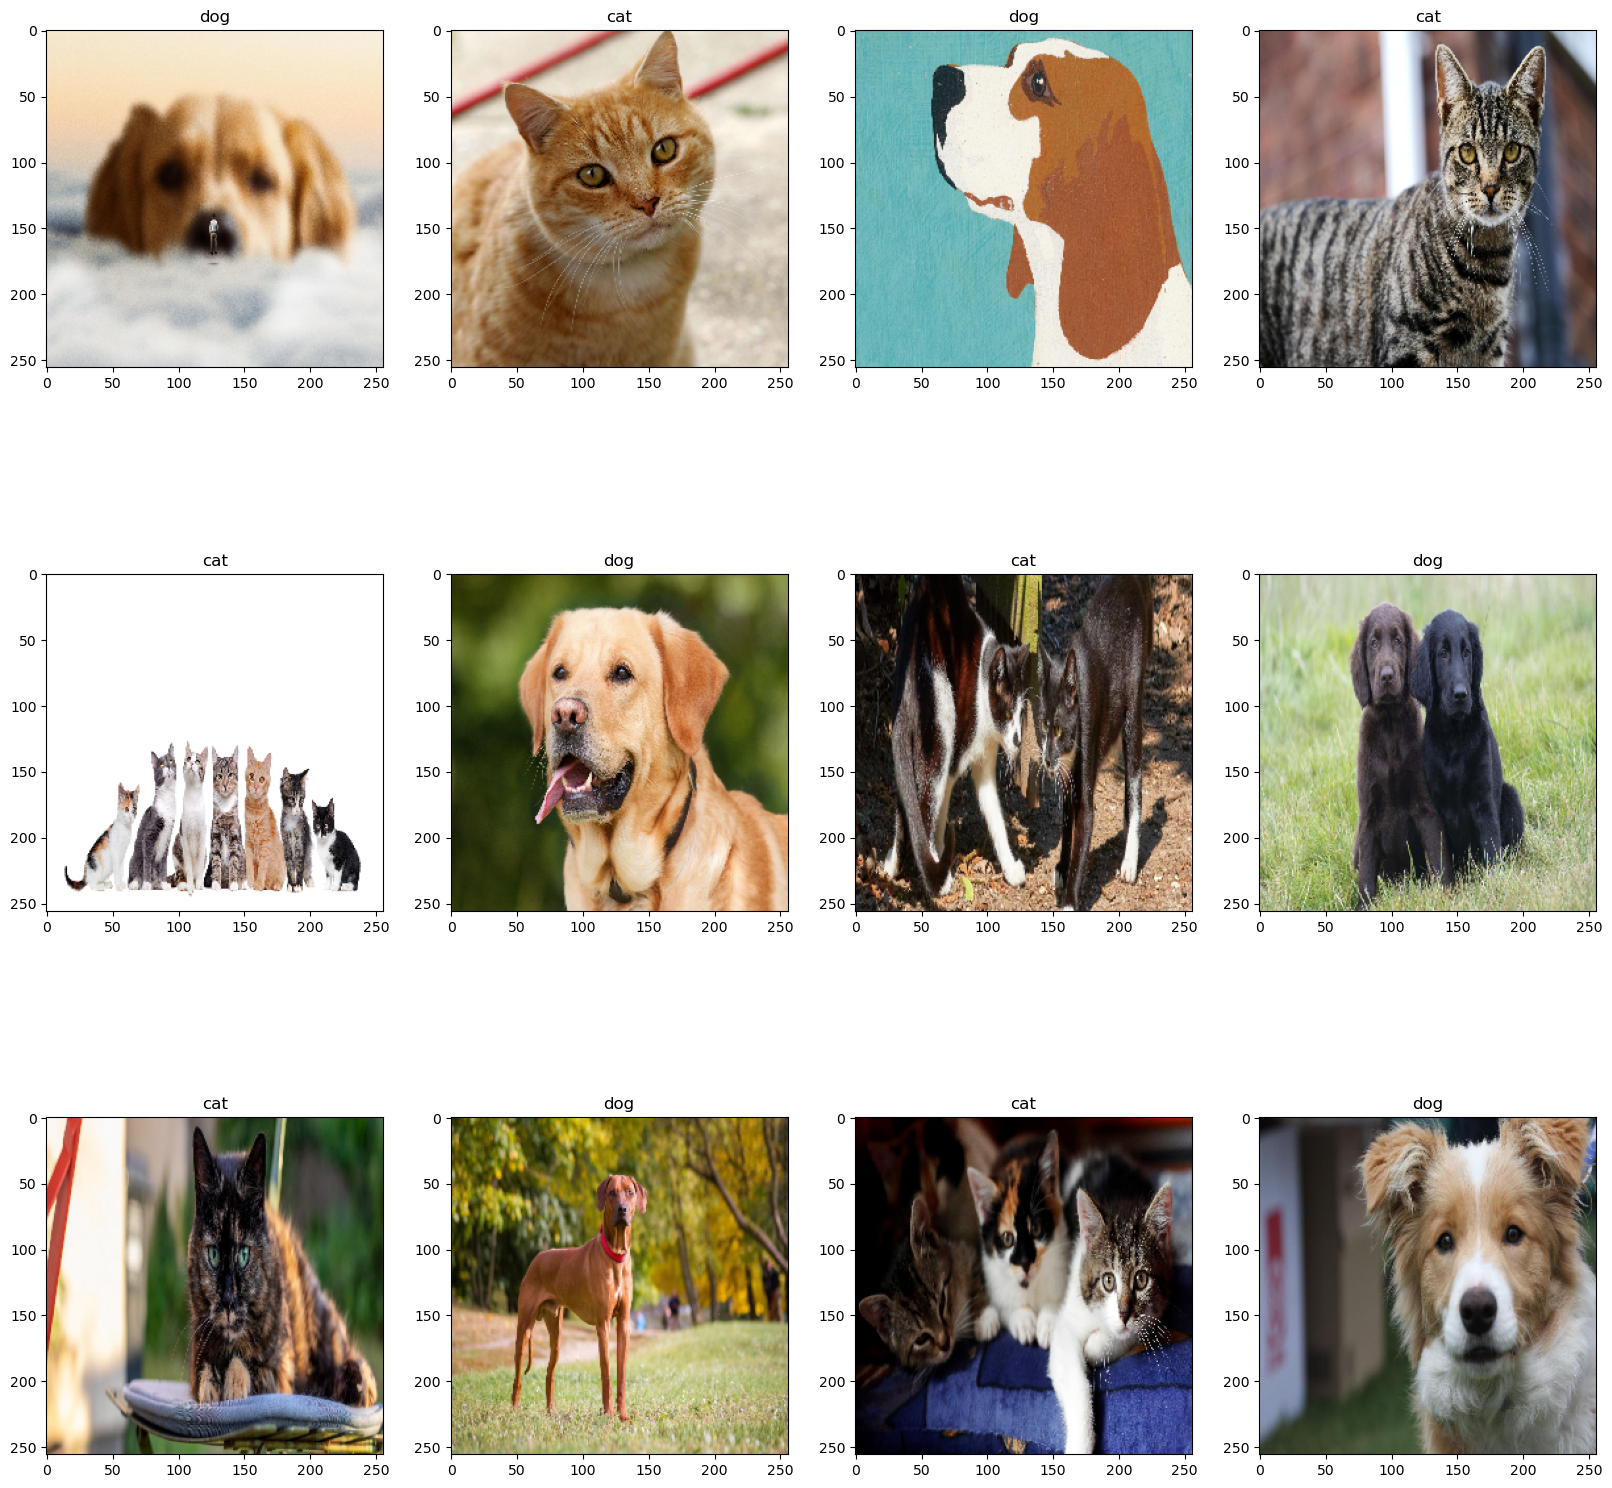

In [27]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=3, ncols=4, figsize=(20,20))
names = {1: 'dog', 0:'cat'}
imgs, labels = data.as_numpy_iterator().next()
imgs = imgs[:]
labels= labels[:]

for idx, (img, label) in enumerate(zip(imgs, labels)):
  ax[idx//4][idx%4].imshow(img.astype(int))
  ax[idx//4][idx%4].title.set_text(names[label])

In [9]:
data.as_numpy_iterator().next()
data=data.map(lambda x, y: (x/255, y)) #preprocessing
data = data.as_numpy_iterator()

In [10]:
test = list(data)

2025-05-27 18:23:23.759179: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [11]:
len(test[0][0])

12

In [12]:
import numpy as np

tflite_results = test_tflite_model('logistic.tflite', test)


INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


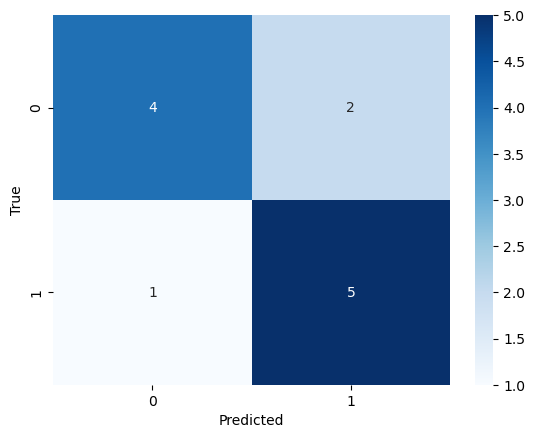

In [13]:
# check whether estimated data is matched with android app results or not.
# 3 estimated results are different with real data.
# let's check in app.

from sklearn.metrics import confusion_matrix
import seaborn as sns
estimated = (tflite_results >= 0.5).astype(int).squeeze()
cm = confusion_matrix(test[0][1], estimated)
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [28]:
list(zip(test[0][1], estimated))

[(1, 1),
 (1, 1),
 (1, 1),
 (0, 0),
 (1, 1),
 (1, 1),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 1),
 (0, 1),
 (1, 0)]